In [228]:
#With the stock return
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [229]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]#mean reversion coeff
    beta = param0[3]#auto regression coeff
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T) 
    sigma2 = np.zeros(T)   
    F = np.zeros(T)   
    v = np.zeros(T)   
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                        (1/2)*(F[t]/v[t])     
        Likelihood = np.sum(GARCH_Dens[1:-1])  
        return Likelihood


def GARCH_PROD(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)  
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
    return Y    

In [230]:
jpm = pd.read_csv(r'C:\Users\krish\Desktop\Subjects\AppliedML\Lec-4\JPM.csv')
jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000


In [231]:
jpm['stock_return'] = jpm['Adj Close'].pct_change()

In [232]:
jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock_return
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,NaN
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,0.000000
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.001893


In [233]:
jpm = jpm[jpm['stock_return'].notna()]

In [257]:
jpm = jpm[jpm['stock_return'].notna()]
jpm = jpm[jpm.stock_return != 0]

In [258]:
jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock_return
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.001893
5,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.000787
6,2016-05-24,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,0.017019


In [235]:
jpm = jpm[jpm.stock_return != 0]

In [255]:
jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock_return
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.001893
5,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.000787
6,2016-05-24,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,0.017019


In [236]:
p_t = (jpm['stock_return'])#.dropna()
T = jpm.shape[0]
timevec = np.linspace(1,T,T)

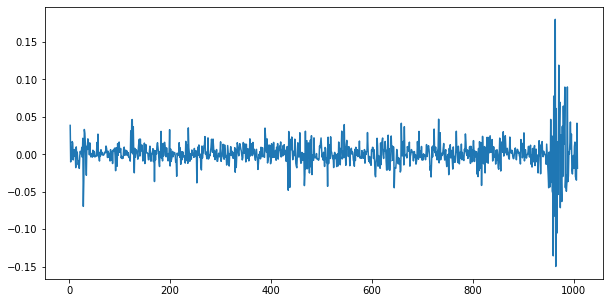

In [263]:
plt.figure(figsize=(10,5))
plt.plot(p_t)

         Current function value: -568.320327
         Iterations: 1
         Function evaluations: 138
         Gradient evaluations: 21


C:\Users\krish\anaconda3\lib\site-packages\ipykernel_launcher.py:6: OptimizeWarning: Unknown solver options: xtol
  


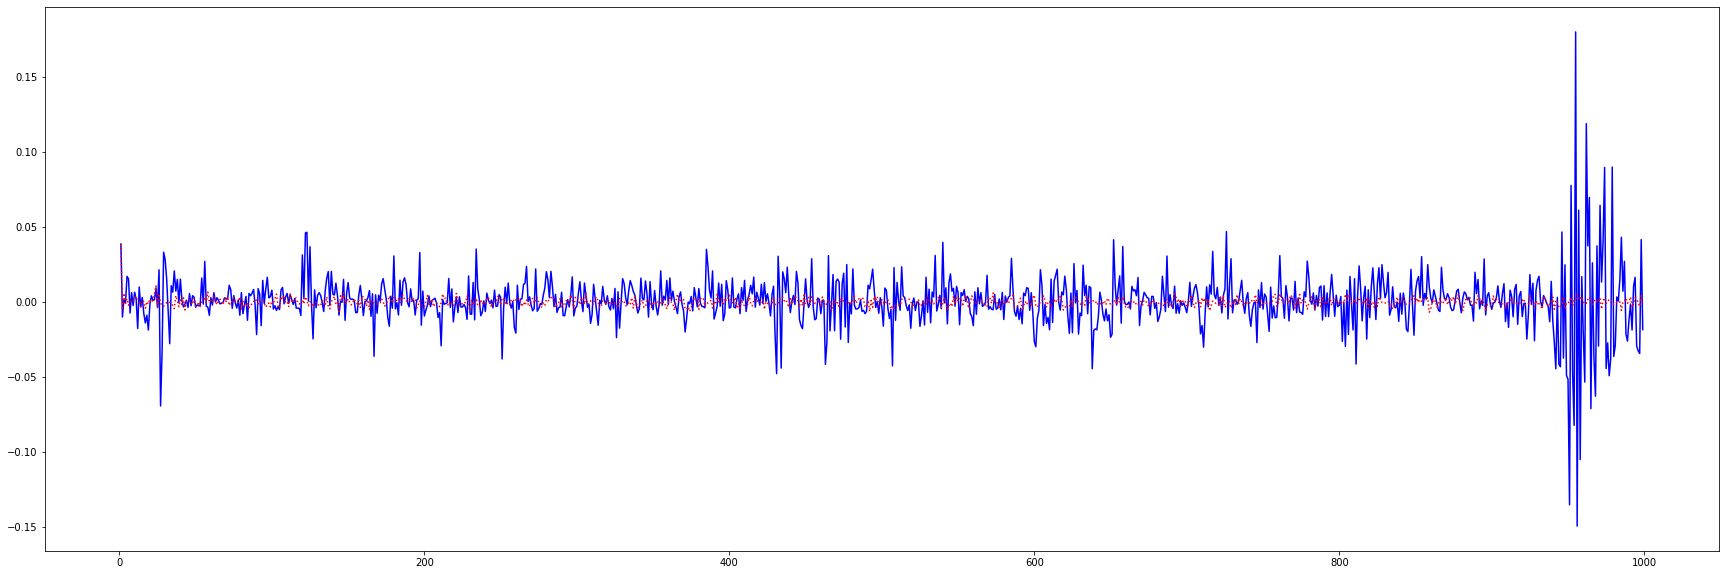

In [249]:
Y=p_t
a = []
plt.figure(figsize=(30,10))
#for z in np.arange(0.4,0.6,0.01): 0.00000001, 0.000005, 0.000000001, 0.8
param0 = np.array([0.00000001, 0.000005, 0.000000001, 0.0008])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[2], T)
timevec = np.linspace(1,T,T)
  #  if(r2_score(Y, Y_GARCH))>0.1:
    #    a.append(z)
     #   print(a)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')

         Current function value: -312.712270
         Iterations: 2
         Function evaluations: 162
         Gradient evaluations: 25


C:\Users\krish\anaconda3\lib\site-packages\ipykernel_launcher.py:5: OptimizeWarning: Unknown solver options: xtol
  """


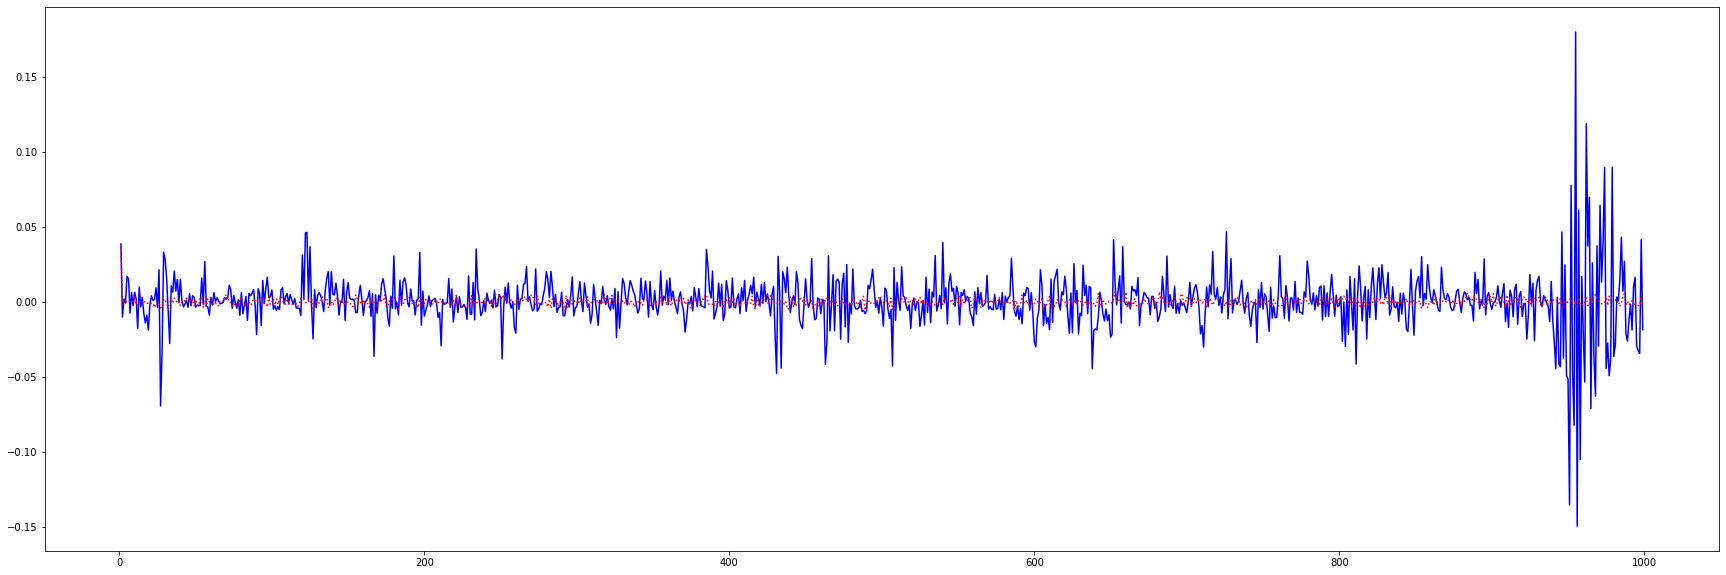

In [269]:
Y=p_t
a = []
plt.figure(figsize=(30,10))
param0 = np.array([0.00000001, 0.000005, 0.000000001, 0.0008])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[2], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')

In [270]:
mean_squared_error(Y,Y_GARCH)

0.0003418104567463245

In [271]:
print(r2_score(Y, Y_GARCH))

-0.008026151277441995


In [267]:
mse = mean_squared_error(Y, Y_GARCH)
rmse = np.sqrt(mse)
rmse

0.018455772597782878

In [252]:
jpm['stock_return'].mean()

0.0006153871905092784